Pittsburgh Police Arrest Data

In [19]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

The highest crime rate shows which neighborhood is the safest by knowing what to do in each situation of crime. Occurance of age of criminal when crime occured combined with population the age was used to find the neighborhood with the most crime.

In [20]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [21]:
arrestAge = pd.read_csv("https://data.wprdc.org/datastore/dump/1e9b0886-5756-413a-b35f-89746cf56fd9")

#arrestAge = arrest_age.drop("Race", axis=1)
#arrestAge = arrest_age.drop("Gender", axis=1)
#arrestAge = arrest_age.drop("Current Age", axis=1)

arrestAge

,Date,Gender,Race,Age at Booking,Current Age
0,2019-06-01,M,B,23.0,25.0
1,2019-06-01,M,B,26.0,27.0
2,2019-06-01,M,B,25.0,26.0
3,2019-06-01,M,B,29.0,31.0
4,2019-06-01,M,B,29.0,30.0
5,2019-06-01,M,B,29.0,30.0
6,2019-06-01,M,W,23.0,24.0
7,2019-06-01,M,B,23.0,23.0
8,2019-06-01,M,B,27.0,27.0
9,2019-06-01,M,W,37.0,38.0


In [22]:
arrestAge['Age at Booking'].value_counts()

26.0    2684
27.0    2620
24.0    2483
31.0    2330
28.0    2306
30.0    2304
29.0    2294
25.0    2248
32.0    2206
23.0    2199
36.0    2135
37.0    1986
22.0    1949
34.0    1871
33.0    1833
21.0    1807
39.0    1724
35.0    1579
38.0    1481
20.0    1295
19.0    1291
49.0    1096
41.0    1051
40.0     959
42.0     925
50.0     922
44.0     855
43.0     849
48.0     818
18.0     760
        ... 
51.0     719
46.0     699
45.0     684
56.0     628
53.0     570
52.0     566
55.0     514
54.0     509
57.0     452
17.0     429
58.0     428
59.0     422
62.0     389
61.0     350
60.0     300
16.0     281
63.0     217
65.0     148
15.0     135
68.0     113
64.0     104
69.0     103
67.0     101
66.0      62
70.0      30
72.0      30
74.0      28
73.0      27
80.0      12
0.0        1
Name: Age at Booking, Length: 61, dtype: int64

This data set shows the occurances of age of arrests. Top ten occurance of crime was done by people of the ages 23-32.

In [23]:
census = pd.read_csv("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/8ac5c768-09ba-43a8-829f-ce4a417d20fb/download/population-density.csv")

census

,Neighborhood,Sector #,Pop. 1940,Pop. 1950,Pop. 1960,Pop. 1970,Pop. 1980,Pop. 1990,Pop. 2000,Pop. 2010,...,% Other (2010),% White (2010),% 2+ Races (2010),% Hispanic (of any race) (2010),% Pop. Age < 5 (2010),% Pop. Age 5-19 (2010),% Pop. Age 20-34 (2010),% Pop. Age 35-59 (2010),% Pop. Age 60-74 (2010),% Pop. Age > 75 (2010)
0,Allegheny Center,3,"4,521","3,862","2,512",632,"1,586","1,262",886,933,...,0.64%,40.84%,0.0397,0.029,0.0419,0.2170,0.2757,0.2243,0.1761,0.0650
1,Allegheny West,3,"3,210","3,313","2,170","1,124",820,654,508,462,...,0.65%,76.62%,0.0303,0.028,0.0000,0.0000,0.0837,0.6820,0.1255,0.1088
2,Allentown,6,"8,227","7,487","6,416","5,361","4,292","3,600","3,220","2,500",...,0.80%,59.40%,0.0464,0.023,0.0366,0.1485,0.2411,0.3530,0.1440,0.0767
3,Arlington,7,"2,702","3,203","4,430","3,949","2,294","2,210","1,999","1,869",...,0.37%,76.46%,0.0316,0.014,0.0691,0.1889,0.1945,0.3153,0.0888,0.1433
4,Arlington Heights,7,"2,413","2,860","2,272","2,037","1,466","1,497",238,244,...,1.64%,9.43%,0.0492,0.008,0.0410,0.3925,0.1638,0.3072,0.0341,0.0614
5,Banksville,5,"1,214","1,328","2,641","4,927","3,831","4,769","4,540","4,144",...,0.53%,88.10%,0.0220,0.014,0.0288,0.1112,0.2516,0.2982,0.0916,0.2185
6,Bedford Dwellings,15,"2,663","3,870","4,915","3,800","2,878","2,317","2,109","1,202",...,0.75%,3.99%,0.0300,0.016,0.1912,0.1305,0.1405,0.2801,0.1696,0.0881
7,Beechview,5,"10,853","11,994","14,032","14,360","11,911","9,311","8,772","7,974",...,2.77%,80.94%,0.0265,0.056,0.0562,0.1530,0.2389,0.3318,0.1203,0.0998
8,Beltzhoover,6,"8,407","8,153","7,064","5,908","4,206","3,338","2,783","1,925",...,1.87%,9.92%,0.0473,0.020,0.0618,0.2683,0.1287,0.2918,0.1297,0.1198
9,Bloomfield,12,"20,708","20,074","16,715","14,411","11,761","10,405","9,089","8,442",...,1.04%,81.57%,0.0222,0.026,0.0369,0.0865,0.4022,0.2747,0.1256,0.0740


In [24]:
#census.sort_values('Neighborhood')['%Pop.Age20-34(2010)'].head(10)

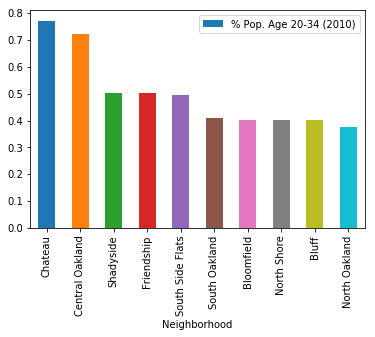

In [26]:
census.nlargest(10, "% Pop. Age 20-34 (2010)").plot(kind = "bar", x = "Neighborhood", y = "% Pop. Age 20-34 (2010)")


Shows the census report of top ten neighborhoods with population of ages 20-34. Chateau has the highest population of those ages making it the most dangerous.